# Assignment #3 - Neural Networks

### <font color="red"> DUE: April 2 (Tuesday) 11:00 pm </font>  

<font color="blue">Gaurav Mahadik</font>

# I. Overview

Describe the objective of this assignment.
The objective of the assignment is to understand Neural Networks for classififcation and regression and thier internal stucture and how the different selected parameters affect the performance of the Neural Network.

You can briefly state how you accompilsh it.


# II. Data

# Regression Data

# Introduction of Data


This classic dataset contains the prices and other attributes of almost 54,000 diamonds along with 10 feature variables which are as follows:

1.price- Price of the Diamonds(USD)

2.carat- Carat Weight of the Diamonds

3.cut - Quality of the cut that is Fair, Good, Very Good, Premium, Ideal

4.color- Color of the diamonds from J (worst) to D (best)

5.clarity- Clarity is a measurement of how clear the diamond is. Its from I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

6.x - Length of the Diamonds in mm

7.y - Width of the Diamondsin mm

8.z - Depth of the Diamondsin mm

9.depth - Total depth percentage 2 * z / (x + y)

10.table - Width of top of diamond relative to widest point

# Source of the Data

https://www.kaggle.com/shivam2503/diamonds

# Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df = df.drop('Unnamed: 0', 1)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df['volume'] = df['x']*df['y']*df['z']
data = df[df['volume']<1000]

In [9]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume'],
      dtype='object')

In [10]:
df.corr()

,carat,depth,table,price,x,y,z,volume
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.976308
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.009157
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.167400
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.902385
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.956564
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.975143
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.950065
volume,0.976308,0.009157,0.167400,0.902385,0.956564,0.975143,0.950065,1.000000


# Visualization of the data

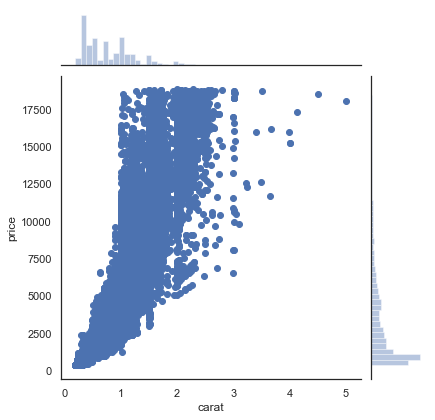

In [11]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(y="price", x="carat", data=df)

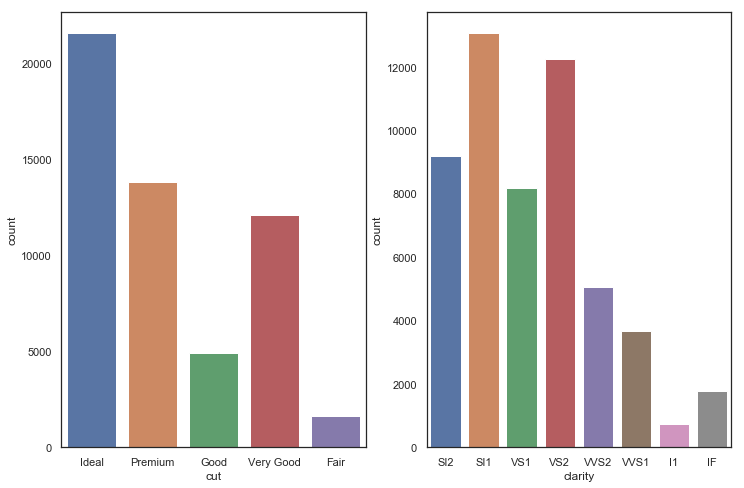

In [12]:
f, axes = plt.subplots(1, 2,figsize=(12,8))
sns.countplot(x= "cut", data=df,  orient='h' , ax=axes[0])
sns.countplot(x= "clarity", data=df,  orient='h' , ax=axes[1])

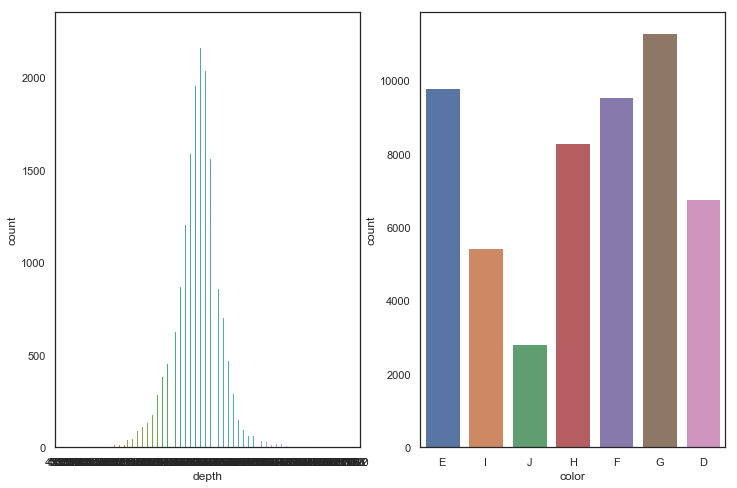

In [13]:
f, axes = plt.subplots(1, 2,figsize=(12,8))
sns.countplot(x= "depth", data=df,  orient='v' , ax=axes[0])
sns.countplot(x= "color", data=df,  orient='v' , ax=axes[1])

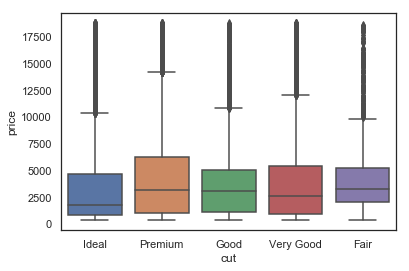

In [14]:
sns.boxplot(x='cut', y='price', data=df)

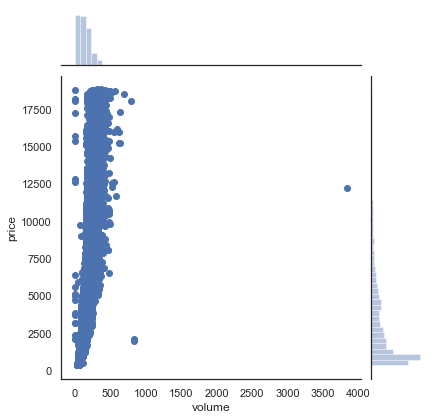

In [15]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="volume", y="price", data=df)

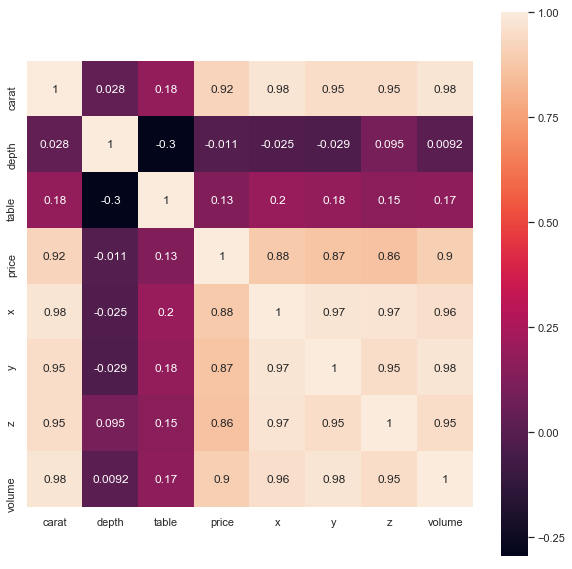

In [16]:
f = plt.subplots(figsize=(10, 10))
corr = df.corr()
sns.heatmap(data=corr, square=True, annot=True,cbar=True)
plt.show()

From the heat map we can observe that there is a neagtive corelation between depth and Price which states that as the depth of the diamond reduces the price of the Diamond increases as there is negative correlation between them. It can be seen that there is a positive correltation between the price and the dimensions of the diamonds as well as with the volume of the Diamond.

# Preliminary Observations

After the analysis of the Dataset from the above visualization the following observations can be seen as follows

The Diamond Carat Weight is varying exponentially with the Diamond price.

There is a high frequency of diamonds having Ideal cut followed by Premium Cut followed by Very Good Cut.

It can be seen that in this dataset there is high number of diamonds having SI1 clarity followed by VS2 clarity.

It can be seen that the diamond with color G has the highest frequency followed by the diamond with color E followed by the others.

It can be seen that Premium Diamond Cut is the most expensive followed by very good cut.

There is a Linear Relationship between the Price of the Diamonds and the volume of the Diamonds.

There is neagtive corelation between depth and Price of the Diamonds and there is a positive correltation between the price and the dimensions of the diamonds as well as with the volume of the Diamond.

# Classification Data

# Introduction of Data
The data set which has been used is a Bank Marketing Dataset which is a record of all the marketing dont by the bank to get customers to deposit money in their bank. This data set is having 11162 rows and 17 columns.This dataset has a binary variable deposit (Yes = yes, No = no) as target variable.The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# Data Source

https://www.kaggle.com/janiobachmann/bank-marketing-dataset

# Reading Data

In [17]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [18]:
df2 = pd.read_csv("bank.csv")
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [20]:
df2 = df2

In [21]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [22]:
df2 = df2.drop(columns=['default', 'loan','contact','poutcome'])

In [23]:
df2.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,5,may,673,2,-1,0,yes


In [24]:
df2 = df2.drop(columns=['previous'])

In [25]:
df2.isnull().head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df2.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
day          0
month        0
duration     0
campaign     0
pdays        0
deposit      0
dtype: int64

In [27]:
df2.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,deposit
0,59,admin.,married,secondary,2343,yes,5,may,1042,1,-1,yes
1,56,admin.,married,secondary,45,no,5,may,1467,1,-1,yes
2,41,technician,married,secondary,1270,yes,5,may,1389,1,-1,yes
3,55,services,married,secondary,2476,yes,5,may,579,1,-1,yes
4,54,admin.,married,tertiary,184,no,5,may,673,2,-1,yes


In [28]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'day',
       'month', 'duration', 'campaign', 'pdays', 'deposit'],
      dtype='object')

In [29]:
encoding_dict = {"marital" : {"single":1 , "married":2 , "divorced":3},
                 "housing" : {"no": -1 , "yes": 1},
                 "month" : {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                 "deposit": {"no":-1,"yes":1}
                }

In [30]:
df2.replace(encoding_dict, inplace = True)

In [31]:
df2.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,deposit
0,59,admin.,2,secondary,2343,1,5,5,1042,1,-1,1
1,56,admin.,2,secondary,45,-1,5,5,1467,1,-1,1
2,41,technician,2,secondary,1270,1,5,5,1389,1,-1,1
3,55,services,2,secondary,2476,1,5,5,579,1,-1,1
4,54,admin.,2,tertiary,184,-1,5,5,673,2,-1,1


# Visualizing the Data

# Age Plot of the Customers

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
groupName = []                                    #making different groups of genders to be plotted ahead
count = []
for group_name, subset in df2.groupby('education'):
    groupName.append(group_name)
    count.append(len(subset))
print(groupName)
print(count)

['primary', 'secondary', 'tertiary', 'unknown']
[1500, 5476, 3689, 497]


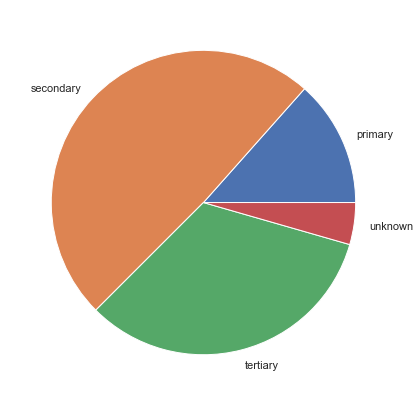

In [33]:
plt.figure(figsize = (7, 7))
plt.pie(count, labels = groupName)
plt.show()

Text(0.5, 1.0, 'Campaign Count Plot')

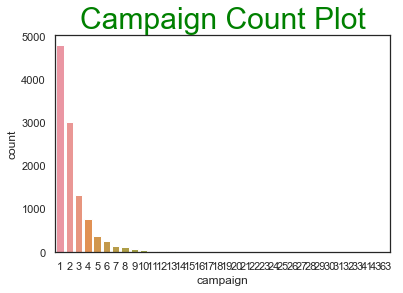

In [34]:
sns.countplot(df2.campaign)
plt.title("Campaign Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Marriage Count Plot')

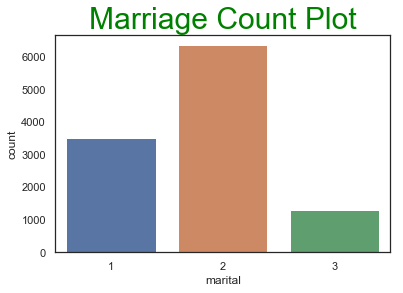

In [35]:
sns.countplot(df2.marital)
plt.title("Marriage Count Plot", color = 'green', fontsize = 30)

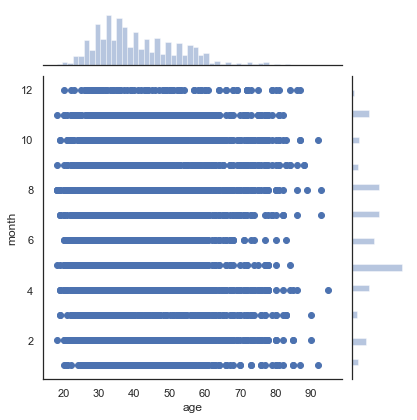

In [36]:
sns.jointplot(df2['age'],df2['month'])

Text(0.5, 1.0, 'Marriage Age Count Plot')

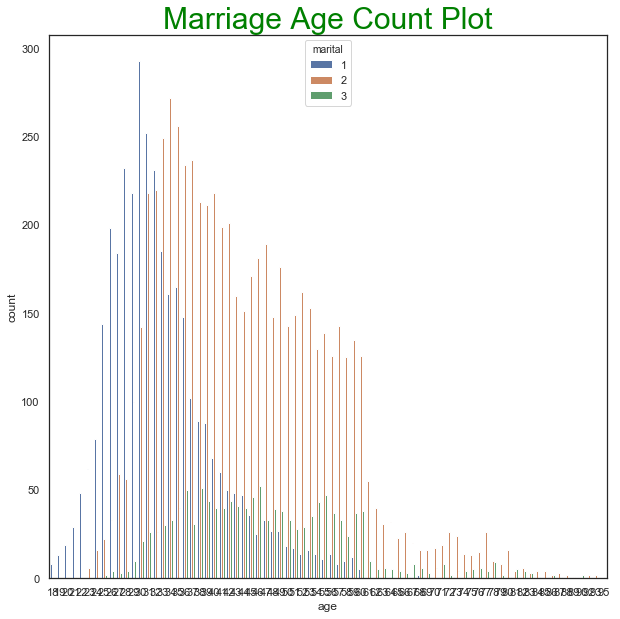

In [37]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df2['age'],hue=df2['marital'])
plt.title("Marriage Age Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Age Deposit Count Plot')

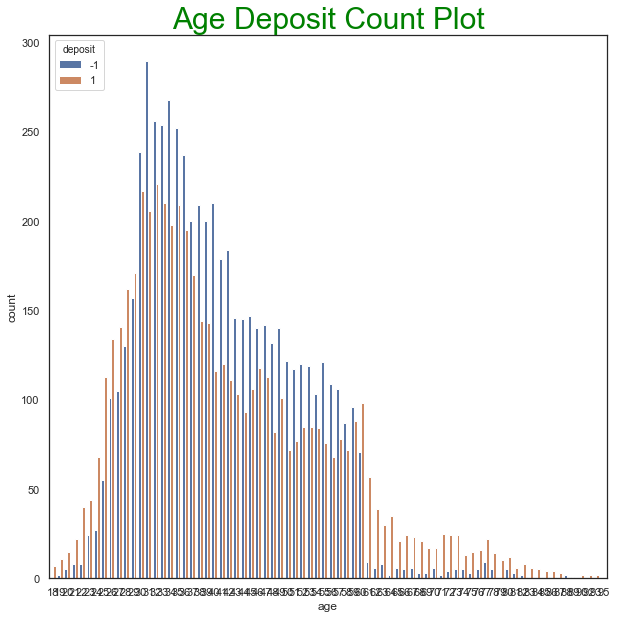

In [38]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df2['age'],hue=df2['deposit'])
plt.title("Age Deposit Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Marriage Deposit Count Plot')

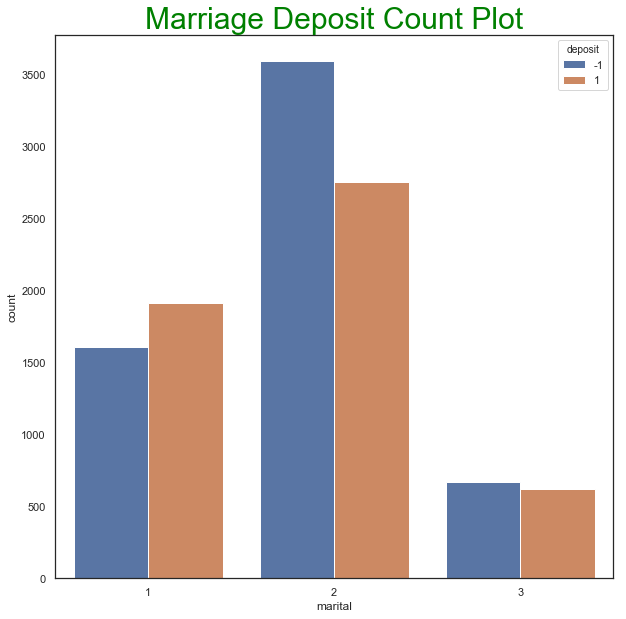

In [39]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df2['marital'],hue=df2['deposit'])
plt.title("Marriage Deposit Count Plot", color = 'green', fontsize = 30)

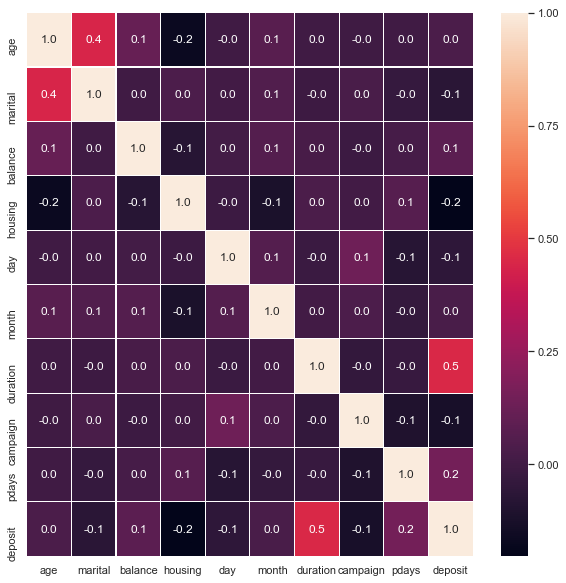

In [40]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df2.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

# Preliminary Observations

Visualization of data has been performed above and the following are the observations that we can observe from the visualizations performed above.

1.There are a large number of people who have secondary education compared to the other people in this particular dataset. Around 50 % of the people have secondary education as we can see from the pie diagram above.

2.We can see that a lot of different campaigns were used to do the marketing of the the schemes the bank had for the customers.However predominantly campaign 1 has been used extensively in this particualar dataset.

3.We can see that we have a mix of three types of people in terms of marital status. Among the large number of people that we have a large portion of them are married followed by single people and then divorced people.

4.We can see in the age month plot that most people who have been contacted by the bank are in the range of 25 to 45 and most of them have been contacted in the month of May

5.The marriage age plot shows us how the age of the people coupled along with their marital status. The following Age deposit plot shows us the age of the people coupled with their decision to deposit or not.

6.The Marriage deposit plot shows the marital status coupled along with the deposit and we can observe that married people are more likely to deposit in the bank followed by single and then the divorced people.

7.The heat map shows the degree of correlation that exists between the different feature vvariables present in the dataset as it can be observed in the above heatmap

# III. Methods

# III.A 5-fold Cross Validation

Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies.

# Summary of CV & correctness of implementation

Cross-validation, sometimes called rotation estimation,or out-of-sample testing is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set).

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.

In summary, cross-validation combines (averages) measures of fitness in prediction to derive a more accurate estimate of model prediction performance.

# 5 Fold Cross Validation 

In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model.

As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method.

As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value.

Cross Validation is a very useful technique for assessing the effectiveness of your model, particularly in cases where you need to mitigate overfitting. It is also of use in determining the hyper parameters of your model, in the sense that which parameters will result in lowest test error.

I have implemented the k fold cross validation fucntion  in this jupyter notebook in the following modules Non Linear Regression and Non Linear Logistic Regression to find good neural network parameters including the structure to report the CV accuracies.

# III.B Nonlinear Regression

Use the NeuralNet class for regression to apply to your data.

Explain your codes (not in comment).

# Summary of nonlinear regression

In statistics, nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations.

Nonlinear regression is a form of regression analysis in which data is fit to a model and then expressed as a mathematical function. Simple linear regression relates two variables (X and Y) with a straight line (y = mx + b), while nonlinear regression must generate a line (typically a curve) as if every value of Y was a random variable. 

The goal of the model is to make the sum of the squares as small as possible. The sum of squares is a measure that tracks how much observations vary from the mean of the data set. It is computed by first finding the difference between the mean and every point of data in the set. Then, each of those differences is squared. 

Lastly, all of the squared figures are added together. The smaller the sum of these squared figures, the better the function fits the data points in the set. Nonlinear regression uses logarithmic functions, trigonometric functions, exponential functions, and other fitting methods.

Nonlinear regression modeling is similar to linear regression modeling in that both seek to graphically track a particular response from a set of variables. Nonlinear models are more complicated than linear models to develop because the function is created through a series of approximations (iterations) that may stem from trial-and-error.

In [41]:
df1 = pd.read_csv("diamonds.csv")

In [42]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
df1 = df1.drop(columns=['Unnamed: 0','cut','color','clarity'])

In [44]:
df1['volume'] = df1['x']*df1['y']*df1['z']

In [45]:
data = df1.sample(15000)

In [46]:
data.head()

,carat,depth,table,price,x,y,z,volume
41668,0.40,61.4,56.0,1240,4.76,4.79,2.93,66.805172
6333,1.06,62.6,58.0,4031,6.52,6.46,4.06,171.003952
41553,0.41,62.3,56.0,1236,4.79,4.77,2.98,68.087934
53132,0.72,61.8,56.0,2618,5.75,5.78,3.56,118.316600
12978,1.01,59.8,56.0,5394,6.57,6.60,3.94,170.846280


In [47]:
X=data.iloc[:,0:-1]
X.shape

(15000, 7)

In [48]:
T=data.iloc[:,-1]
T= T.values.reshape(T.shape[0],1)
T.shape

(15000, 1)

In [49]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [50]:
""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 400)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [51]:
nn = NeuralNet([7,64,1])
nn.train(X,T) 
Y = nn.use(X)

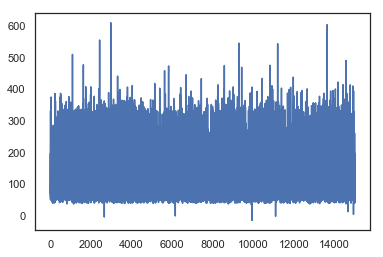

In [52]:
plt.plot(Y)

# Cross Validation for Non Linear Regression

In [53]:
X=data.loc[:,["carat","depth","price"]].values
mux = np.mean(X,0)  
sigmax = np.std(X,0)
X= (X - mux) / sigmax 
X.shape

(15000, 3)

In [54]:
T=data.loc[:,["volume"]]
mu = np.mean(T,0)  
sigma = np.std(T,0)
T = (T - mu) / sigma 
T= T.values.reshape(T.shape[0],1)
T.shape

(15000, 1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.2, random_state=0)

In [56]:
import sklearn
from sklearn.model_selection import KFold
def cross_validation(xdata,ydata,nfolds,layers):
    errors = []
    testErrs = []
    xdata=xdata[0:1000]   
    i = 0
    print(xdata)
    
    if len(xdata)/nfolds >= 1 and len(ydata)/nfolds >= 1:
        kf = KFold(n_splits = nfolds)
        
        
    for train_index, test_index in kf.split(xdata):
        
        residual=[]
        para=[]    
        
        kf_val = KFold(n_splits = nfolds-1)
        x_temp = xdata[train_index]
        
        X_train_cv = np.array(xdata)[train_index]
        X_test_cv = np.array(xdata)[test_index]
            
        Y_train_cv = np.array(ydata)[train_index]
        Y_test_cv = np.array(ydata)[test_index]
        
        
        for train_index_val,validation_index in kf_val.split(x_temp):

            X_train_new = np.array(x_temp)[train_index_val]
            X_val_new = np.array(x_temp)[validation_index]
            
            Y_train_new = np.array(ydata)[train_index_val]
            Y_val_new = np.array(ydata)[validation_index]
            
            max_acc = 0
            n_col=np.array(xdata.shape)[1]
            for neurons in layers:
                net = NeuralNet([n_col,neurons,1])
                net.train( X_train_new, Y_train_new)
                classes = net.use(X_val_new)
                accuracy = 100 - np.mean(np.abs(Y_val_new - classes)) * 100
                
                if accuracy > max_acc:
                    max_acc = accuracy 
                
                residual.append(accuracy)
                para.append(neurons)
                
                
        print(i+1,"th iteration done")
        i+=1
        best_acc = max(residual)
        minInd = residual.index(best_acc)
        weight = para[minInd]
        errors.append([weight,best_acc])
        print(errors)
        print("*************************************")
        net_cv = NeuralNet([n_col,weight,1])
        net_cv.train(X_train_cv, Y_train_cv)
        classes = net_cv.use(X_test_cv)
        test_err = 100 - np.mean(np.abs(Y_test_cv - classes))
        testErrs.append([weight,test_err])
        import matplotlib .pyplot as plt
        fig,ax = plt.subplots()
        ax.scatter(Y_val_new,classes,edgecolors=(0,0,0))
        ax.plot([Y_val_new.min(),Y_val_new.max()],[Y_val_new.min(),Y_val_new.max()],'k--',lw=4)
        ax.set_xlabel('Measured')
        ax.set_ylabel('Predicted')
        plt.show()
    
    return testErrs

In [57]:
X_train = X[0:1000]
T_train = T[0:1000]
print("Train Shape Check:", X_train.shape, T_train.shape)

Train Shape Check: (1000, 3) (1000, 1)


In [58]:
X_test = X[0:1000]
T_test = T[0:1000]
print("Test Shape Check:", X_test.shape, T_test.shape)

Test Shape Check: (1000, 3) (1000, 1)


[[-0.84382187 -0.24887479 -0.67936707]
 [ 0.55561669  0.59561145  0.02498223]
 [-0.82261826  0.38448989 -0.68037653]
 ...
 [ 2.93042153  0.5252376   2.97133772]
 [ 0.23756247 -1.7267257   0.08100715]
 [-0.50456404  0.5252376  -0.57514054]]
1 th iteration done
[[10, 21.54303989422729]]
*************************************


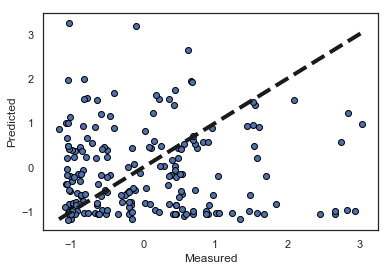

2 th iteration done
[[10, 21.54303989422729], [12, 19.58880005734646]]
*************************************


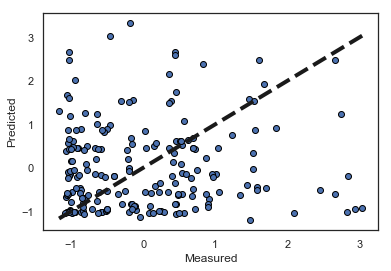

3 th iteration done
[[10, 21.54303989422729], [12, 19.58880005734646], [7, 46.70129937550641]]
*************************************


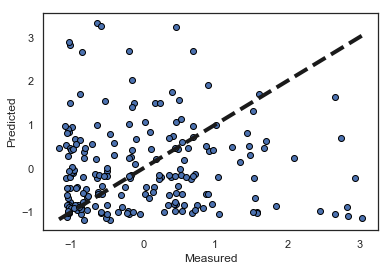

4 th iteration done
[[10, 21.54303989422729], [12, 19.58880005734646], [7, 46.70129937550641], [7, 73.2847067009936]]
*************************************


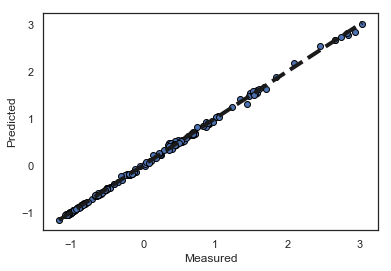

5 th iteration done
[[10, 21.54303989422729], [12, 19.58880005734646], [7, 46.70129937550641], [7, 73.2847067009936], [9, 97.80026099868698]]
*************************************


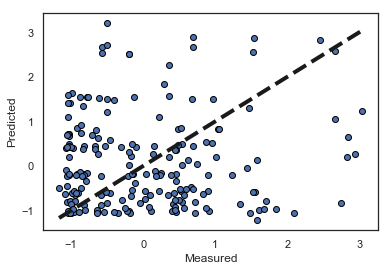

In [59]:
layers=[7,9,10,11,12]
cross=cross_validation(X,T,5,layers)

In [105]:
n_col=np.array(X_train.shape)[1]
best_para = max(cross,key = lambda x:x[1])
final_train_nn = NeuralNet([n_col,best_para[0],1])
final_train_nn.train(X_train, T_train,ftracep=True)
predicted_values = final_train_nn.use(X_test)
acc = 100 - np.mean(np.abs(T_test - predicted_values)) *100
rmse_error =np.sqrt(np.sum((T_test-predicted_values)**2))
print("RMS error is :",rmse_error)
print("Accuracy is :",acc)

RMS error is : 32.26764360026283
Accuracy is : 70.59203375024049


# Explanation of Code

# NeuralNet class

__init__ : It inherits the same initialization class as NeuralNet
 
forward : It inherits the same inialization class. 

object_f : It calculates the error by the log function. It also takes care of the the Y not being 0 by adding a small possible value(epsilon) to it because log of 0 is not defined.

train : It preprocesses the inputs and then trains it. This function is also recursive function which calls itself. The target data that is being passed to this function is an indicator matrix which represents of the classes of the data in separate columns.

use : applies the trained network to predict

# Presentation of CV Results

[[-0.84382187 -0.24887479 -0.67936707]
 [ 0.55561669  0.59561145  0.02498223]
 [-0.82261826  0.38448989 -0.68037653]
 ...
 [ 2.93042153  0.5252376   2.97133772]
 [ 0.23756247 -1.7267257   0.08100715]
 [-0.50456404  0.5252376  -0.57514054]]
1 th iteration done
[[12, 21.300187928743924]]
*************************************


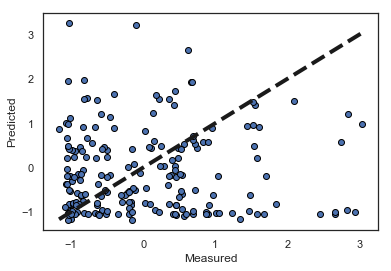

2 th iteration done
[[12, 21.300187928743924], [11, 20.55886969566501]]
*************************************


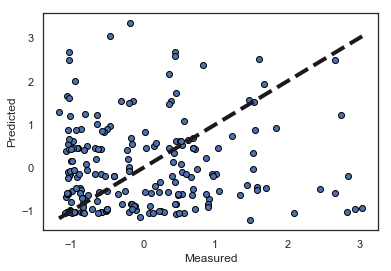

3 th iteration done
[[12, 21.300187928743924], [11, 20.55886969566501], [7, 48.69807913849073]]
*************************************


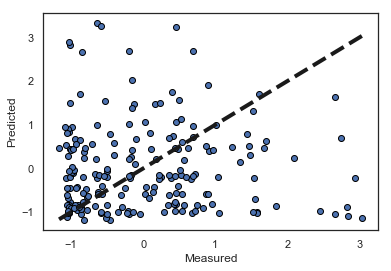

4 th iteration done
[[12, 21.300187928743924], [11, 20.55886969566501], [7, 48.69807913849073], [7, 74.65110531938298]]
*************************************


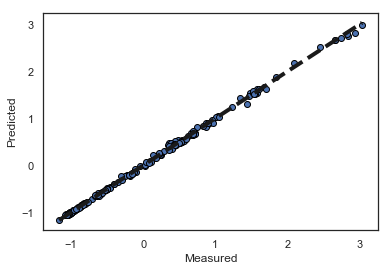

5 th iteration done
[[12, 21.300187928743924], [11, 20.55886969566501], [7, 48.69807913849073], [7, 74.65110531938298], [7, 97.79537888625205]]
*************************************


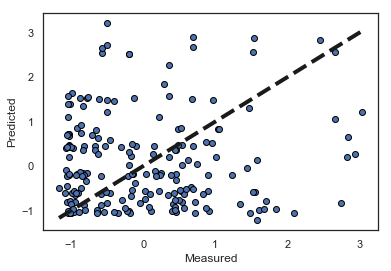

[[12, 99.9778187308746],
 [11, 99.97727861286243],
 [7, 99.97741054358295],
 [7, 99.97757586544321],
 [7, 99.97405738429572]]

In [61]:
layers=[7,9,10,11,12]
cross=cross_validation(X,T,5,layers)
cross

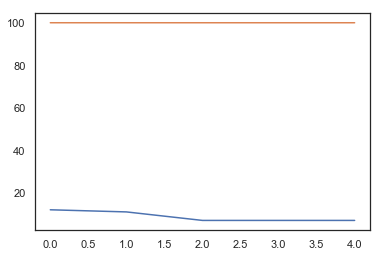

In [62]:
plt.plot(cross)

# Plots for Results

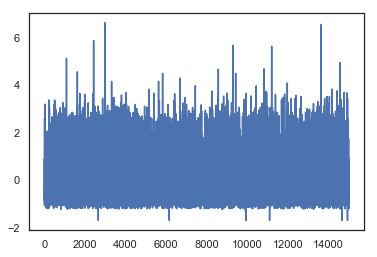

In [63]:
plt.plot(T)

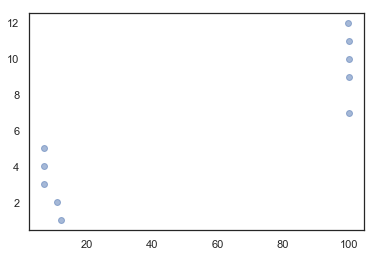

In [64]:
M= [(1,7),(2,9),(3,10),(4,11),(5,12)]
plt.scatter(cross, M, alpha=0.5)
plt.show()

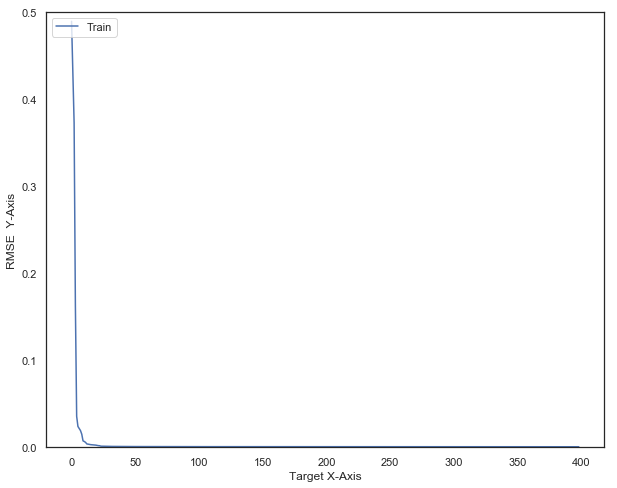

In [66]:
plt.figure(figsize=(10,8))
plt.plot(final_train_nn.ftrace)
plt.ylim(0,0.5)
plt.xlabel('Target X-Axis')
plt.ylabel('RMSE  Y-Axis')
plt.legend(('Train','Test'),loc='upper left')

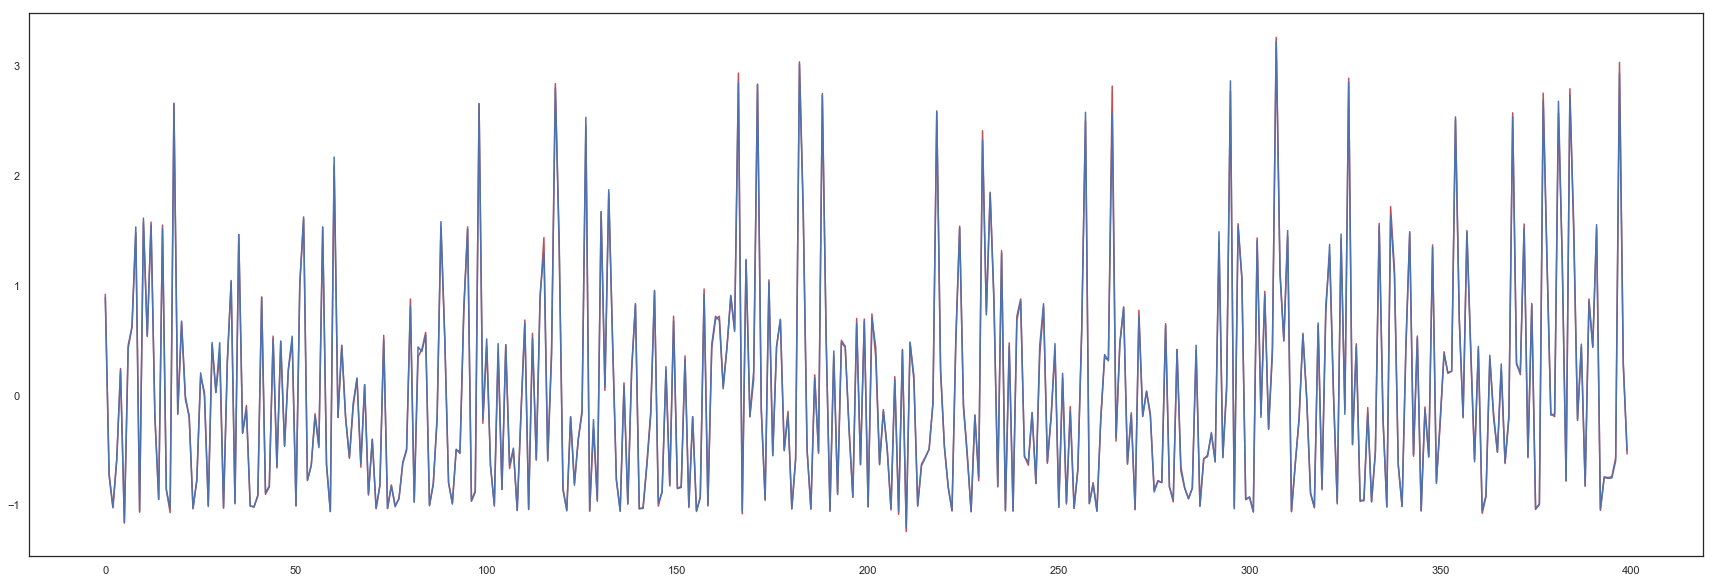

In [67]:
plt.figure(figsize=(30,10))
plt.plot(T_test[600:1000],'-r')
plt.plot(predicted_values[600:1000],'-b')

# III.C Nonlinear Logistic Regression

Finish the following NeuralNetLogReg class.

Check if your codes works well with toy synthetic data.

Apply to your classification data.

Explain your codes (not in comment).

# Summary of nonlinear logistic regression

Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
w_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(w) = - \ln P(T \mid w) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$


#### Summary (Regression vs Classification)


<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm \\
Gm & = softmax(Ym)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
Vm &leftarrow Vm + \alpha_h \frac{1}{N} \frac{1}{K} Xlm^\top \Big( (Tm - Ym) Wm^\top \odot (1 - Zm^2) \Big) \\
Wm &leftarrow Wm + \alpha_o \frac{1}{N} \frac{1}{K} Zlm^\top \Big( Tm - Ym \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h Xlm^\top \Big( (Tm - Gm) Wm^\top \odot (1 - Zm^2) \Big)\\
Wm &\leftarrow Wm + \alpha_o Zlm^\top \Big(  Tm - Gm\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $Tm$ is a matrix with indicator variable outputs, <br/>
and $Gm$ is the output matrix after the softmax layer.</td>
</tr>
</table> 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df2  = pd.read_csv('bank.csv')

In [70]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [71]:
df2 = df2.drop(columns=['default', 'loan','contact','poutcome','job','previous'])

In [72]:
encoding_dict = {"marital" : {"single":1 , "married":2 , "divorced":3},
                 "housing" : {"no": -1 , "yes": 1},
                 "month" : {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                 "deposit": {"no":0,"yes":1},
                 "education" :{"unknown":0,"primary":1,"secondary":2,"tertiary":3}
                }

In [73]:
df2.replace(encoding_dict, inplace = True)

In [74]:
df2.head()

,age,marital,education,balance,housing,day,month,duration,campaign,pdays,deposit
0,59,2,2,2343,1,5,5,1042,1,-1,1
1,56,2,2,45,-1,5,5,1467,1,-1,1
2,41,2,2,1270,1,5,5,1389,1,-1,1
3,55,2,2,2476,1,5,5,579,1,-1,1
4,54,2,3,184,-1,5,5,673,2,-1,1


In [75]:
def normalize(X):
    return (X/X.max())

In [76]:
df2["month"] = normalize(df2["month"])

In [77]:
df2["duration"] = normalize(df2["duration"])

In [78]:
df2["campaign"] = normalize(df2["campaign"])

In [79]:
df2["day"] = normalize(df2["day"])

In [80]:
df2["age"] = normalize(df2["age"])

In [81]:
df2["marital"] = normalize(df2["marital"])

In [82]:
df2["education"] = normalize(df2["education"])

In [83]:
df2["balance"] = normalize(df2["balance"])

In [84]:
df2["housing"] = normalize(df2["housing"])

In [85]:
df2 = df2.drop(columns=['pdays'])

In [86]:
df2.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
0,0.621053,0.666667,0.666667,0.028853,1.0,0.16129,0.416667,0.268488,0.015873,1
1,0.589474,0.666667,0.666667,0.000554,-1.0,0.16129,0.416667,0.377995,0.015873,1
2,0.431579,0.666667,0.666667,0.015640,1.0,0.16129,0.416667,0.357897,0.015873,1
3,0.578947,0.666667,0.666667,0.030491,1.0,0.16129,0.416667,0.149188,0.015873,1
4,0.568421,0.666667,1.000000,0.002266,-1.0,0.16129,0.416667,0.173409,0.031746,1


In [87]:
data = df2.sample(10000)

In [88]:
data.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
9777,0.389474,0.666667,0.666667,0.001724,1.0,0.225806,0.416667,0.126256,0.015873,0
628,0.378947,0.666667,1.000000,0.001182,-1.0,0.967742,0.583333,0.187838,0.063492,1
3503,0.484211,0.666667,1.000000,0.003362,1.0,0.322581,0.416667,0.150219,0.095238,1
5623,0.389474,0.666667,1.000000,-0.008202,1.0,0.580645,0.916667,0.052564,0.031746,0
1542,0.421053,0.666667,0.333333,0.003497,1.0,0.645161,0.333333,0.343211,0.031746,1


In [89]:
X=data.iloc[:,0:-1]
X = X.as_matrix()
X.shape

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(10000, 9)

In [90]:
T=data.iloc[:,-1]
T = T.as_matrix()
T = T.reshape(T.shape[0],1)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [91]:
T.shape

(10000, 1)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.7, random_state=42)

In [93]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self,nunits)

   
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f)) 
    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t,z = NeuralNet.forward(self,X)
        return self.softmax(t),z

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        epsilon=1e-12
        Y = np.clip(Y, epsilon, 1. - epsilon)
        N = Y.shape[0]
        ce = -np.sum(np.sum(T*np.log(Y+1e-9)))
        return ce

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        NeuralNet.train(self,X,T)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Xs = X
        classes, probabilities = self.forward(Xs)
        if self.stdT is None:
            classes = self.stdT.unstandardize(classes)
        return np.argmax(classes,1),probabilities,classes


# Examination of correct implementation (NonlinearLogReg) with toy data.

Text(0.5, 1.0, 'test data set')

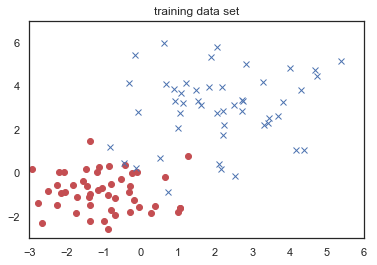

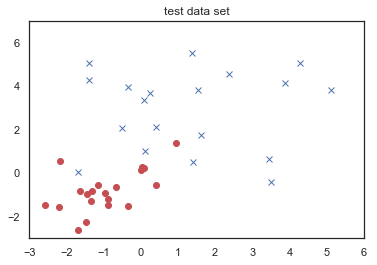

In [94]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [95]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y, Z = clsf.use(Xtest)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [96]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [97]:
Y

[array([[-1.46589321, -2.24586683],
        [-1.44673678, -0.96497556],
        [ 0.40204285, -0.52902376],
        [-1.31438906, -0.80919444],
        [-1.3380498 , -1.28201091],
        [-1.68885058, -2.64101334],
        [-0.34248141, -1.53712478],
        [-1.14684964, -0.5645906 ],
        [-0.95187428, -0.9368786 ],
        [-2.1822202 ,  0.54658284],
        [-0.88494417, -1.45015707],
        [-0.88332086, -1.17412185],
        [ 0.01915657,  0.26998698],
        [-1.63670887, -0.81638908],
        [-2.18700569, -1.55862287],
        [ 0.07465861,  0.22614346],
        [-2.56620639, -1.46526914],
        [ 0.93612546,  1.36549528],
        [-0.66762497, -0.64153386],
        [-0.00773886,  0.12078349],
        [ 1.36733818,  5.50763631],
        [-1.37947494,  4.26575199],
        [ 0.07773392,  3.34950031],
        [ 3.86308348,  4.14254094],
        [ 2.37631358,  4.57144071],
        [ 0.24423159,  3.69426197],
        [-0.35056022,  3.95841457],
        [ 1.41504483,  0.504

Accuracy:  55.0 %


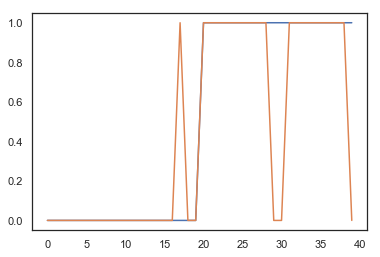

In [98]:
plt.plot(Ttest)
plt.plot(classes)

Tl = np.argmax(Ttest,1)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - classes)) * 100, "%")

In [99]:
import sklearn
from sklearn.model_selection import KFold
def cross_validations(xdata,ydata,nfolds,layers):
    errors = []
    testErrs = []
    xdata=xdata[0:1000]   
    i = 0
    print(xdata)
    
    if len(xdata)/nfolds >= 1 and len(ydata)/nfolds >= 1:
        kf = KFold(n_splits = nfolds)
        
        
    for train_index, test_index in kf.split(xdata):
        
        residual=[]
        para=[]    

        
        kf_val = KFold(n_splits = nfolds-1)
        x_temp = xdata[train_index]
        
        
        X_train_cv = np.array(xdata)[train_index]
        X_test_cv = np.array(xdata)[test_index]
            
        Y_train_cv = np.array(ydata)[train_index]
        Y_test_cv = np.array(ydata)[test_index]
        
        
        for train_index_val,validation_index in kf_val.split(x_temp):

            X_train_new = np.array(x_temp)[train_index_val]
            X_val_new = np.array(x_temp)[validation_index]
            
            Y_train_new = np.array(ydata)[train_index_val]
            Y_val_new = np.array(ydata)[validation_index]
            
            n_col=np.array(xdata.shape)[1]
            for neurons in layers:
                net = NeuralNetLogReg([n_col,neurons,2])
                net.train(X_train_new, Y_train_new)
                classes,q,w = net.use(X_val_new)
                accuracy = 100 - np.mean(np.abs(Y_val_new - classes)) * 100
                residual.append(accuracy)
                para.append(neurons)
                
                
        print(i+1,"th iteration done")
        i+=1
        best_acc = max(residual)
        minInd = residual.index(best_acc)
        weight = para[minInd]
        errors.append([weight,best_acc])
        print(errors)
        print("*************************************")
        net_cv = NeuralNetLogReg([n_col,weight,2])
        net_cv.train(X_train_cv, Y_train_cv)
        classes,q,w = net_cv.use(X_test_cv)
        test_err = 100 - np.mean(np.abs(Y_test_cv - classes))
        testErrs.append([weight,test_err])
    
    return testErrs

In [100]:
layers=[7,9,10,11,12]
cross=cross_validations(X,T,5,layers)
print(cross)

[[0.38947368 0.66666667 0.66666667 ... 0.41666667 0.12625612 0.01587302]
 [0.37894737 0.66666667 1.         ... 0.58333333 0.18783819 0.06349206]
 [0.48421053 0.66666667 1.         ... 0.41666667 0.15021902 0.0952381 ]
 ...
 [0.35789474 0.66666667 0.33333333 ... 0.41666667 0.22726102 0.01587302]
 [0.31578947 0.66666667 1.         ... 0.16666667 0.29193507 0.04761905]
 [0.31578947 0.33333333 1.         ... 0.16666667 0.05849008 0.03174603]]


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


1 th iteration done
[[10, 54.0]]
*************************************
2 th iteration done
[[10, 54.0], [7, 54.0]]
*************************************
3 th iteration done
[[10, 54.0], [7, 54.0], [9, 54.0]]
*************************************


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


4 th iteration done
[[10, 54.0], [7, 54.0], [9, 54.0], [7, 54.0]]
*************************************
5 th iteration done
[[10, 54.0], [7, 54.0], [9, 54.0], [7, 54.0], [10, 54.0]]
*************************************
[[10, 99.48515], [7, 99.485], [9, 99.54], [7, 99.47], [10, 99.55]]


In [104]:
n_col=np.array(X_train.shape)[1]
best_para = max(cross,key = lambda x:x[1])
final_train = NeuralNetLogReg([n_col,best_para[0],2])
final_train.train(X_train, T_train)
predicted_values,q,w = final_train.use(X_test)
acc = 100 - np.mean(np.abs(T_test - predicted_values)) *100
rmse_error =np.sqrt(np.sum((T_test-predicted_values)**2))
print("RMS error is :",rmse_error)
print("Accuracy is :",acc)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


RMS error is : 4986.536072264995
Accuracy is : 49.253995918367345


# Explanation of codes

# Neural Net Logistic Regression Class

Importing the NeuralNet class will basically import the major functions to be used. The addition will be the non-liniearity at the end of the neural network.

__init__ : It inherits the same initialization class as NeuralNet
 
forward : It inherits the same inialization class.

softmax : returns the probablity of the classes.

object_f : It calculates the error by the log function. It also takes care of the the Y not being 0 by adding a small possible value(epsilon) to it because log of 0 is not defined.

train : It preprocesses the inputs and then trains it. This function is also recursive function which calls itself. The target data that is being passed to this function is an indicator matrix which represents of the classes of the data in separate columns.

use : applies the trained network to predict

# Presentation of CV results

[[10, 99.48515], [7, 99.485], [9, 99.54], [7, 99.47], [10, 99.55]]


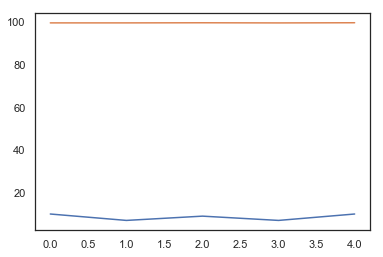

In [102]:
print(cross)
plt.plot(cross)

# Plots for results

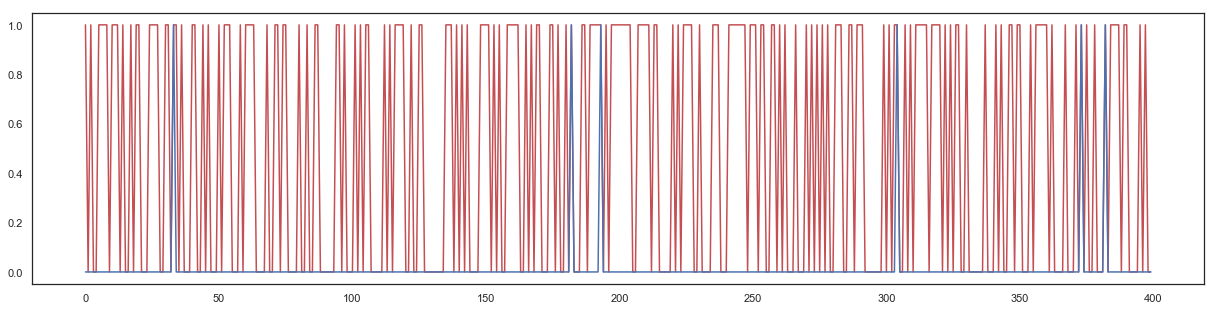

In [103]:
plt.figure(figsize=(21,5))
plt.plot(T_test[600:1000],'-r')
plt.plot(predicted_values[600:1000],'-b')

# Discussions about parameter/network structure choice

In cross validation to check the accuracy I have selected number of layers as the variable entity in each iteration.

The hidden unit is the important factor which was taking a lot of time when I used the number of layers as 128 so I reduced it to 64 for quicker implementation.

Also taking all the features for cross validation took a lot of time to train so I reduced it to just important features in the dataset which I found as 3 in Assignment1.

The parameter which is giving less error is chosen in cross validation for the training of the whole model, therefore we get better results at the end.Hence cross validation plays important role in case of paramter selection for the model.

# Discussion about the prediction results. Try to analyze what nonlinear regression model learned.

From the plotted graphs, it can be inferred that the RMSE error in the non-linear regression and non-linear logistic regression increases w.r.t to the number of samples. 

Graphs plotted after every iteration in the cross validation improves. This clearly shows that model is learning after every iteration.

Once we get the best parameters corresponding to our data, predicted values are very similar to the actual values and hence line graph shows minimum deviation.

The Nonlinear Regression tries to learn the weights of the features which can be used to understand the distribution of the data and hence it helps to improve the accuracy while predicting the target value. And hence non-linear regression is giving more accuracy.

Optimality of the model depends on the multiple factors such as the distribution of the data, number of neurons(number of layers), learning rater etc.

In non-linear logistic regression, we first run the implementation on the toy data. As the implementation of the model runs successfully on the toy data, we apply the same on the classification data and analyze the results.

One important observation is that, the output that I am getting is biased as the cross validation may contain the data towards one class because of which the model is giving biased output. I think that this can be overcome if we have equal distributions of all the classes in the target variable.

# Conclusions

- Because of some confusion in the problem statement, initially it was very difficult to understand what exactly was expected from us.
- Implementing NeuralNet and visualizing it with more than two features was challenging.
- Another challenge about this assignment was to understand the NeuralNet class functions. 
- The concept of cross validation and its implementation was fun and quite interesting.

# References

Nonlinear Neural Network's Notebook by Dr. Lee

Neural Networks notebook

Assignment 1 and Assignment 2 codes

Matplotlib. Retrieved from https://matplotlib.org/

Seaborn. Retrieved from https://seaborn.pydata.org/

Wikipedia. Retrived from https://www.wikipedia.org/

Stackoverflow. Retrived from https://stackoverflow.com/
    
Towards Data Science Retrived from https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f
    
Investopedia  Retrived from https://www.investopedia.com/terms/n/nonlinear-regression.asp

And More

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
